# Fouille de données : data challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Dimensions du jeu de données (spectres) d'entraînement et de test :

In [2]:
# Entraînement
spectra_train = pd.read_csv("data/spectra-train.csv", sep=";", header=None)
n_spectra_train = spectra_train.shape[0]
p = spectra_train.shape[1]

# Test
spectra_test = pd.read_csv("data/spectra-test.csv", sep=";", header=None)
n_spectra_test = spectra_test.shape[0]

# Caractéristiques
print("Dimension jeu de données (spectres) d'entraînement : {} x {}".format(n_spectra_train, p))
print("Dimension jeu de données (spectres) de test : {} x {}".format(n_spectra_test, p))

Dimension jeu de données (spectres) d'entraînement : 3114 x 627
Dimension jeu de données (spectres) de test : 1197 x 627


In [3]:
meta_train = pd.read_csv("data/meta-train.csv", sep=";", header=0)
species_train = np.array(meta_train.loc[:, 'species'])
strain_train = np.array(meta_train.loc[:, 'strain'])
species_names = np.unique(species_train)
num_species = len(species_names)
print("{} catégories: {}".format(num_species, species_names))

42 catégories: ['sp_1' 'sp_10' 'sp_11' 'sp_12' 'sp_13' 'sp_14' 'sp_15' 'sp_16' 'sp_17'
 'sp_18' 'sp_19' 'sp_2' 'sp_20' 'sp_21' 'sp_22' 'sp_23' 'sp_24' 'sp_25'
 'sp_26' 'sp_27' 'sp_28' 'sp_29' 'sp_3' 'sp_30' 'sp_31' 'sp_32' 'sp_33'
 'sp_34' 'sp_35' 'sp_36' 'sp_37' 'sp_38' 'sp_39' 'sp_4' 'sp_40' 'sp_41'
 'sp_42' 'sp_5' 'sp_6' 'sp_7' 'sp_8' 'sp_9']


Encodage de chaque espèce avec `LabelEncoder` :

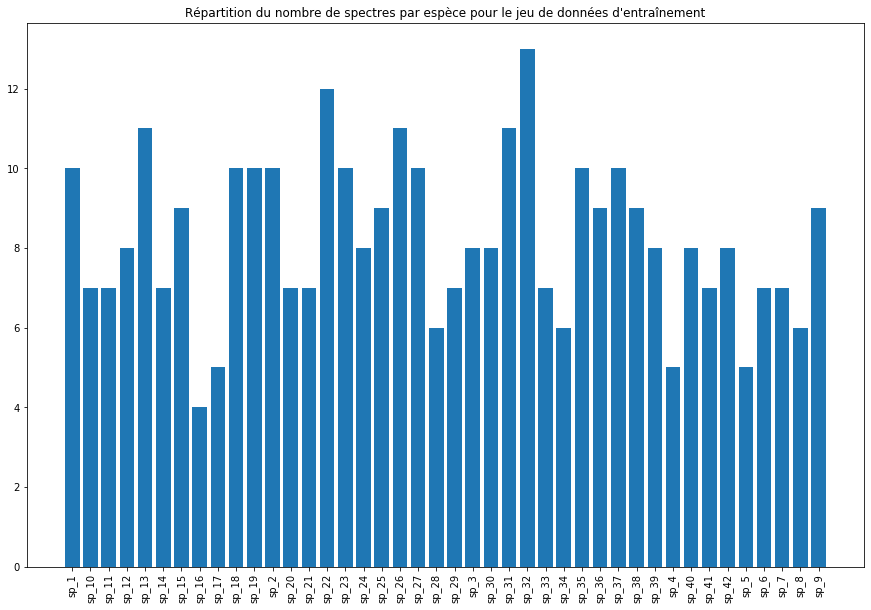

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(species_train)
plt.figure(figsize=(15, 10))
plt.bar(species_names, np.bincount(y_train)/9)
plt.title("Répartition du nombre de spectres par espèce pour le jeu de données d'entraînement")
plt.xticks(rotation=90)
plt.show()

## Approche naïf avec 4 espèces

On ne prend pas en compte les souches et on essaie de prédire pour chaque spectre indépendemment l'espèce, et on choisit l'espèce prédite majoritaire par souche.

In [8]:
df = pd.concat([spectra_train, meta_train], axis=1)
df = df.loc[df['species'].isin(["sp_1", "sp_2", "sp_3", "sp_4"])]
X = df.drop(columns="strain")
y = df.loc[:, "species"]
y_names = np.unique(y_train)
n = X.shape[0]
p = X.shape[1]

# Caractéristiques
print("Dimension jeu de données (spectres) d'entraînement : {} x {}".format(n, p))

Dimension jeu de données (spectres) d'entraînement : 297 x 628


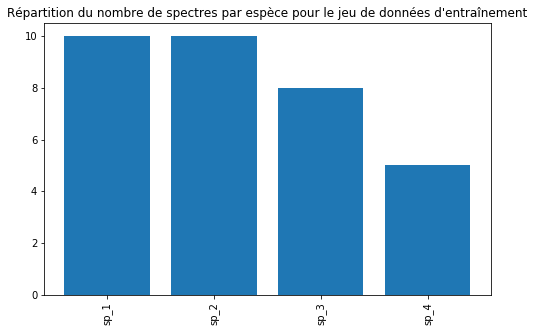

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)
plt.figure(figsize=(8, 5))
plt.bar(y_names, np.bincount(y_train)/9)
plt.title("Répartition du nombre de spectres par espèce pour le jeu de données d'entraînement")
plt.xticks(rotation=90)
plt.show()

ACP sur les 4 classes :